In [4]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential  # for a sequential model 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import cv2
%matplotlib inline

import pickle

pickle_in = open("Xreg.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yreg.pickle","rb")
y = pickle.load(pickle_in)

X = np.array(X) #normalizing data

y = np.array(y)

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = 10
X_test = np.array([X[i] for i in range((len(X)//df))])
X_train = np.array([X[i] for i in range((len(X)//df),len(X))])

y_test = np.array([y[i] for i in range((len(y)//df))])
y_train = np.array([y[i] for i in range((len(y)//df),len(y))])

In [10]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "regression-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logreg/{}'.format(NAME))

# Regression NN

In [49]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_test.shape[1:]))   #convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3)))                                 # convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))                                       # dropout 20% of the neurons

model.add(Conv2D(256, (3, 3)))                                 # convolution
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())                                       # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.2))                                   # dropout 20% of the neurons

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.2))                                  # dropout 20% of the neurons

model.add(Dense(4))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

my_model_aug = model.fit(X_train, y_train, batch_size=32, epochs=50,validation_split=0.3,callbacks=[tensorboard])

Train on 6300 samples, validate on 2700 samples
Epoch 1/10
6300/6300 [==============================] - 369s 59ms/step - loss: 2513.3307 - acc: 0.6210 - val_loss: 1608.6089 - val_acc: 0.8663
Epoch 2/10
6300/6300 [==============================] - 366s 58ms/step - loss: 1336.3229 - acc: 0.7505 - val_loss: 1723.0023 - val_acc: 0.8852
Epoch 3/10
6300/6300 [==============================] - 363s 58ms/step - loss: 1167.2998 - acc: 0.8048 - val_loss: 1016.4251 - val_acc: 0.9026
Epoch 4/10
6300/6300 [==============================] - 364s 58ms/step - loss: 1014.9894 - acc: 0.8310 - val_loss: 1166.8470 - val_acc: 0.9178
Epoch 5/10
6300/6300 [==============================] - 362s 58ms/step - loss: 932.0367 - acc: 0.8421 - val_loss: 1052.5268 - val_acc: 0.9119
Epoch 6/10
6300/6300 [==============================] - 373s 59ms/step - loss: 881.2648 - acc: 0.8406 - val_loss: 767.3678 - val_acc: 0.9056
Epoch 7/10
6300/6300 [==============================] - 364s 58ms/step - loss: 902.1449 - acc: 0.

In [50]:
model.save('reggeo.model') #save the model

In [51]:
#evaluate loss and accuracy
score = model.evaluate(X_test,y_test)
score


1000/1000 [==============================] - 15s 15ms/step


[800.8946528320313, 0.902]

In [52]:
print("Loss:", score[0])
print("Accuracy:", score[1])

Loss: 800.8946528320313
Accuracy: 0.902


In [4]:
new_model = tf.keras.models.load_model('reggeo.model') #loading the model

predictions = new_model.predict([X_test]) #testing the model 

In [54]:
predictions[0]

array([ 76.7576  ,   9.269249, 168.71162 , 142.15474 ], dtype=float32)

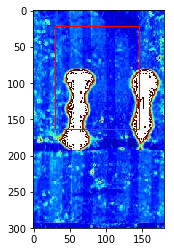

In [8]:
import matplotlib.patches as patches
import random
j=int(random.randint(0,(len(X)//df)))



data0 = pd.read_csv('annotations.csv',sep=',',names = ['img_address','n1','n2','n3','n4','classe'])
fig,ax = plt.subplots(1)

pts = predictions[j]
imagem = cv2.imread(data0['img_address'][j])

# Display the image
plt.imshow(imagem)

# Create a Rectangle patch
    
rect = patches.Rectangle((pts[0],pts[1]),pts[2],pts[3],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
#ax.set(xticks=[], yticks=[])
# Add the patch to the Axes
plt.show()

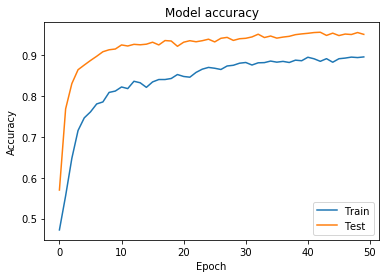

In [13]:
data_vacc = pd.read_csv('run_regression-1538659962-tag-val_acc.csv',sep=',')
data_acc = pd.read_csv('run_regression-1538659962-tag-acc.csv',sep=',')


plt.plot(data_acc['Value'])
plt.plot(data_vacc['Value'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')


In [1]:
#plt.plot(new_model.history['acc'])
#plt.plot(new_model.history['val_acc'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='lower right')


In [2]:
#plt.plot(my_model_aug.history['loss'])
#plt.plot(my_model_aug.history['val_loss'])
#plt.title('Model loss')
#plt.ylabel('loss')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper right')
